In [ ]:
!nvidia-smi

Tue May 16 07:12:59 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    24W / 300W |      0MiB / 16384MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/CAVIAR_PROJECT

/content/drive/MyDrive/CAVIAR_PROJECT


In [ ]:
!tar -xvf "CAVIAR_DATA_SET.tar.gz"

Streaming output truncated to the last 5000 lines.
CAVIAR_DATA_SET/val/images/489.jpg
CAVIAR_DATA_SET/val/images/690.jpg
CAVIAR_DATA_SET/train/images/3477.jpg
CAVIAR_DATA_SET/train/labels/1385.txt
CAVIAR_DATA_SET/train/images/2722.jpg
CAVIAR_DATA_SET/val/images/2488.jpg
CAVIAR_DATA_SET/train/images/1630.jpg
CAVIAR_DATA_SET/train/images/2385.jpg
CAVIAR_DATA_SET/test/labels/30.txt
CAVIAR_DATA_SET/test/labels/496.txt
CAVIAR_DATA_SET/train/images/3152.jpg
CAVIAR_DATA_SET/test/labels/166.txt
CAVIAR_DATA_SET/train/labels/1060.txt
CAVIAR_DATA_SET/train/images/447.jpg
CAVIAR_DATA_SET/test/labels/1877.txt
CAVIAR_DATA_SET/test/labels/2644.txt
CAVIAR_DATA_SET/test/labels/3069.txt
CAVIAR_DATA_SET/test/labels/1547.txt
CAVIAR_DATA_SET/train/labels/260.txt
CAVIAR_DATA_SET/train/images/4349.jpg
CAVIAR_DATA_SET/train/labels/4451.txt
CAVIAR_DATA_SET/train/labels/1832.txt
CAVIAR_DATA_SET/test/images/1981.jpg
CAVIAR_DATA_SET/val/labels/3132.txt
CAVIAR_DATA_SET/train/images/122.jpg
CAVIAR_DATA_SET/val/labe

In [4]:
pip install ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.5/585.5 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 205.1/205.1 kB 17.4 MB/s eta 0:00:00


In [ ]:
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.103 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.7/166.8 GB disk)


In [ ]:
%pip install wandb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 27.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 20.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.8 MB/s eta 0:00:00
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8791 sha256=5b8998a8bf0495f27d52943b918bdf33105367d1a574628ea204cbb1f7d68c1e
  Stored in directory: /root/.cache/pip/wheels/e7/f3/22/152153d6eb222ee7a56ff8617d80ee5207207a8c00a7aab794
Successfully built pathtools


In [ ]:
import wandb

!wandb login 6c0814026f0d2effbf54e3ab95e7e3e7e683c500
# wandb login 6c0814026f0d2effbf54e3ab95e7e3e7e683c500

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [ ]:
wandb.init(
    # set the wandb project where this run will be logged
    project="detect-actions",
    
    # track hyperparameters and run metadata
    config={
    "architecture": "YOLOV8",
    "dataset": "CAVIAR",
    "epochs": 150,
    }
)

wandb: Currently logged in as: sampathde4 (sampaththennakoon). Use `wandb login --relogin` to force relogin


In [ ]:
pwd

'/content/drive/MyDrive/CAVIAR_PROJECT'

In [ ]:
!yolo task=detect mode=train model=yolov8s.pt data=data.yaml epochs=150 plots=True batch=32

100% 21.5M/21.5M [00:00<00:00, 159MB/s]
Ultralytics YOLOv8.0.103 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=data.yaml, epochs=150, patience=50, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, 

In [5]:
!yolo task=detect mode=predict model='/content/drive/MyDrive/CAVIAR_PROJECT/runs/detect/train/weights/best.pt' conf=0.75 source='/content/drive/MyDrive/CAVIAR_PROJECT/CAVIAR_DATA_SET/test/images' save=True save_txt=True

Ultralytics YOLOv8.0.104 🚀 Python-3.10.11 torch-2.0.0+cu118 CPU
Model summary (fused): 168 layers, 11128293 parameters, 0 gradients

image 1/1338 /content/drive/MyDrive/CAVIAR_PROJECT/CAVIAR_DATA_SET/test/images/10.jpg: 480x640 2 BROWSINGs, 695.2ms
image 2/1338 /content/drive/MyDrive/CAVIAR_PROJECT/CAVIAR_DATA_SET/test/images/1004.jpg: 480x640 1 BROWSING, 461.8ms
image 3/1338 /content/drive/MyDrive/CAVIAR_PROJECT/CAVIAR_DATA_SET/test/images/1007.jpg: 480x640 1 BROWSING, 477.2ms
image 4/1338 /content/drive/MyDrive/CAVIAR_PROJECT/CAVIAR_DATA_SET/test/images/1009.jpg: 480x640 1 BROWSING, 488.9ms
image 5/1338 /content/drive/MyDrive/CAVIAR_PROJECT/CAVIAR_DATA_SET/test/images/1016.jpg: 480x640 1 BROWSING, 506.3ms
image 6/1338 /content/drive/MyDrive/CAVIAR_PROJECT/CAVIAR_DATA_SET/test/images/1025.jpg: 480x640 1 BROWSING, 499.2ms
image 7/1338 /content/drive/MyDrive/CAVIAR_PROJECT/CAVIAR_DATA_SET/test/images/1027.jpg: 480x640 1 BROWSING, 533.8ms
image 8/1338 /content/drive/MyDrive/CAVIAR_PROJEC

In [6]:
from PIL import Image

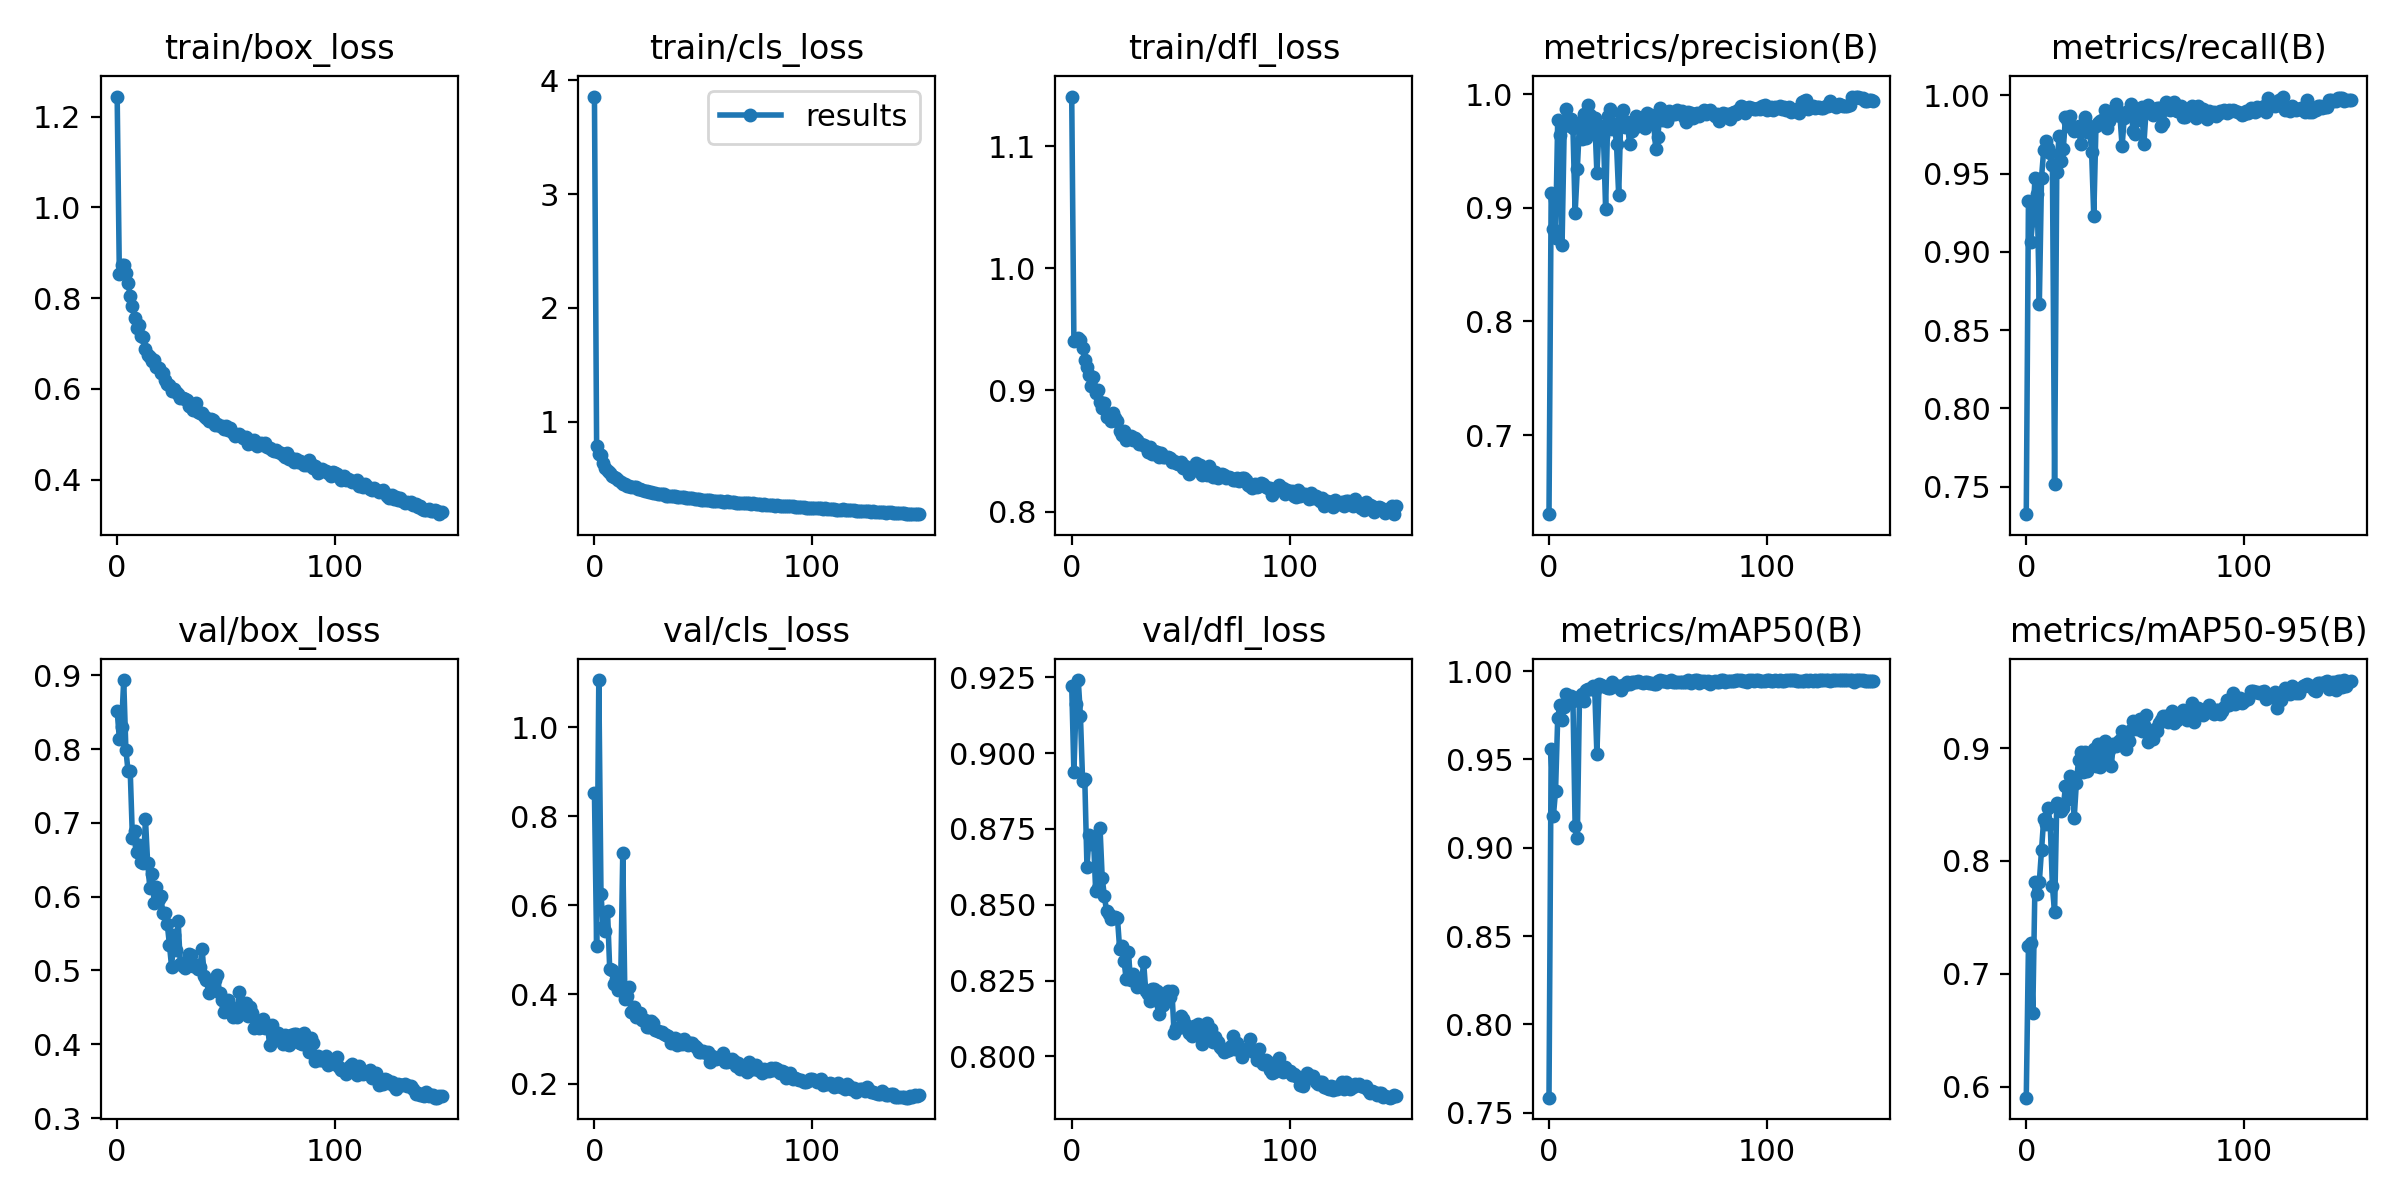

In [7]:
from PIL import Image
image0=Image.open('/content/drive/MyDrive/CAVIAR_PROJECT/runs/detect/train/results.png')
image0

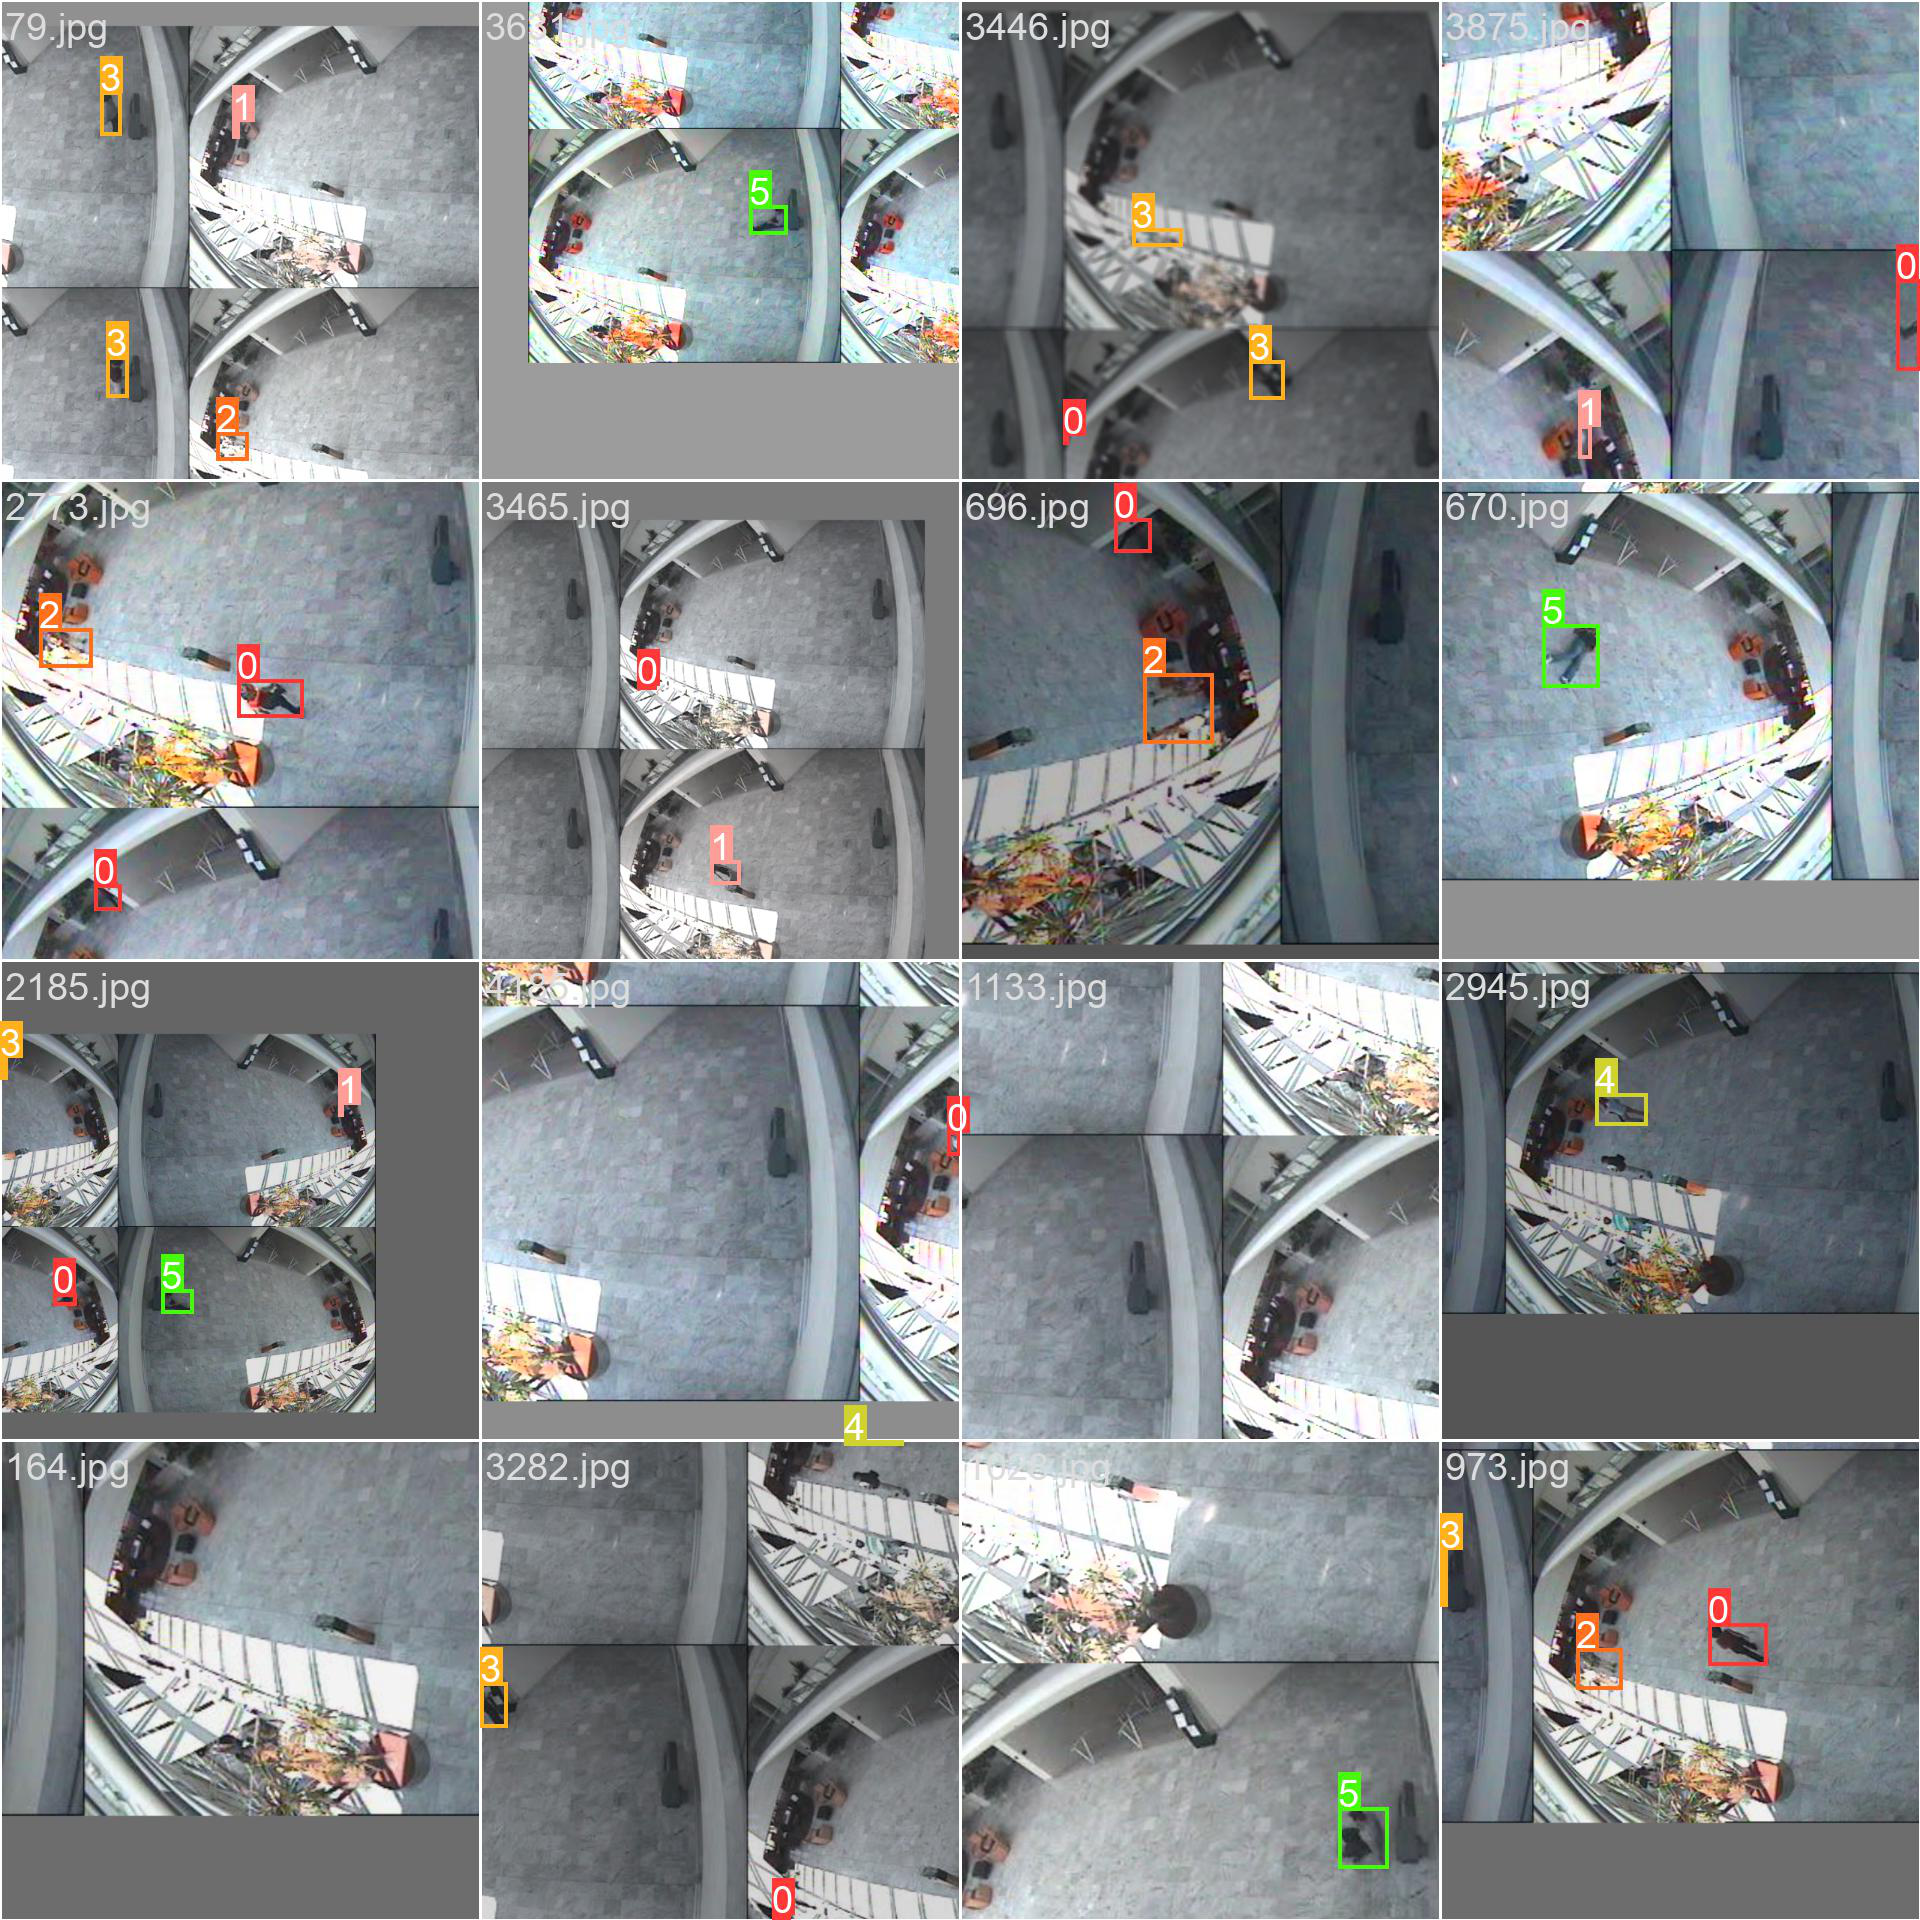

In [11]:
image1=Image.open('/content/drive/MyDrive/CAVIAR_PROJECT/runs/detect/train/train_batch2.jpg')
image1

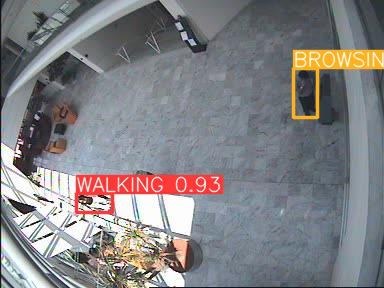

In [16]:
image2=Image.open('/content/drive/MyDrive/CAVIAR_PROJECT/runs/detect/predict/141.jpg')
image2

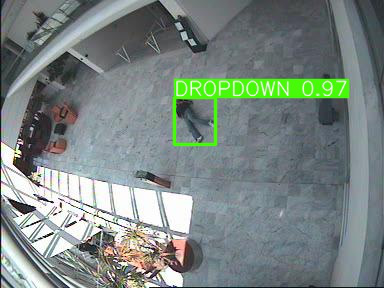

In [13]:
image3=Image.open('/content/drive/MyDrive/CAVIAR_PROJECT/runs/detect/predict/1916.jpg')
image3